In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
n=100
dates = pd.date_range(start='2022-01-01', end='2024-12-31').tolist()
product_categories = ['Machinery', 'Electronics', 'Tools', 'Automotive']
regions = ['North', 'South', 'East', 'West']    
customer_types = ['Retail', 'Corporate', 'Distributor']
sales_channels = ['Online', 'Offline']

data={
    'Order_ID': np.arange(1001, 1001+n),
    'Date': np.random.choice(dates, n),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice(['Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt', 
                                      'Drill', 'Motor', 'Valve', 'Gearbox'], n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.random.uniform(0, 0.25, n),
    'Sales_Channel': np.random.choice(sales_channels, n)
}
df = pd.DataFrame(data)
print(df)

    Order_ID       Date Product_Category     Product_Name Region  \
0       1001 2024-08-26        Machinery          Gearbox   West   
1       1002 2023-05-03      Electronics            Valve  North   
2       1003 2024-08-17      Electronics       Compressor   East   
3       1004 2022-03-09      Electronics            Valve  North   
4       1005 2023-08-15       Automotive            Motor   East   
..       ...        ...              ...              ...    ...   
95      1096 2023-02-01            Tools  Welding Machine  North   
96      1097 2022-05-23        Machinery             Pump   East   
97      1098 2022-08-05      Electronics    Conveyor Belt  South   
98      1099 2022-07-27      Electronics       Compressor  North   
99      1100 2023-10-25        Machinery            Drill   East   

   Customer_Type  Units_Sold  Unit_Price  Discount Sales_Channel  
0      Corporate          60        2160  0.106542        Online  
1    Distributor          94        2293  0.08356

In [34]:
print("Overall sales and profit trends over time")
df['Total_sales'] = df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])
df['Profit_Amount'] = df['Total_sales'] * np.random.uniform(0.1, 0.3, n)
time_series = df.groupby('Date').agg({'Total_sales': 'sum', 'Profit_Amount': 'sum'})
print(time_series)

Overall sales and profit trends over time
              Total_sales  Profit_Amount
Date                                    
2022-01-12  383709.095342   61050.316436
2022-01-16  131564.665460   18966.510519
2022-01-20  471962.362521   67078.522909
2022-02-02  391117.385930   92040.120063
2022-02-05  219393.451959   54433.354252
...                   ...            ...
2024-11-19  475354.494826  108896.077332
2024-11-21   35620.789735    6680.313444
2024-11-26  477402.767736  105703.139680
2024-12-16  287896.029077   38977.874660
2024-12-30  103954.559123   23285.819344

[93 rows x 2 columns]


In [48]:
print("Which product categories and regions are driving revenue and profit")
category_region = df.groupby(['Region','Product_Category']).agg({'Total_sales': 'sum', 'Profit_Amount': 'sum'})
print(category_region)

Which product categories and regions are driving revenue and profit
                          Total_sales  Profit_Amount
Region Product_Category                             
East   Automotive        1.726007e+06  350994.453168
       Electronics       9.845772e+05  190245.197222
       Machinery         1.647851e+06  266685.685884
       Tools             2.308812e+06  503586.583499
North  Automotive        6.714361e+05  154315.919343
       Electronics       1.176124e+06  216101.190493
       Machinery         2.315153e+06  419983.225095
       Tools             1.134851e+06  211765.251036
South  Automotive        2.331959e+06  510356.112064
       Electronics       4.550792e+05   62267.613935
       Machinery         1.336468e+06  255024.532361
       Tools             1.347809e+06  271524.889436
West   Automotive        7.305646e+05  159375.261011
       Electronics       9.947582e+05  220800.156375
       Machinery         2.510173e+06  527650.684091
       Tools             1.4902

In [51]:
print("How do discounts, sales channels, and customer types influence profitability")
influence = df.groupby(['Sales_Channel','Customer_Type','Discount']).agg({'Total_sales': 'sum', 'Profit_Amount': 'sum'})
print(influence)

How do discounts, sales channels, and customer types influence profitability
                                        Total_sales  Profit_Amount
Sales_Channel Customer_Type Discount                              
Offline       Corporate     0.016955  507762.255870   94921.589738
                            0.020416  551137.506438  147439.641760
                            0.020419  396362.074774   66039.363698
                            0.025340  146611.292352   34981.589347
                            0.039311  501335.787824   55998.094821
...                                             ...            ...
Online        Retail        0.165866  648284.457492   83328.925269
                            0.188911   88220.487645   16774.428478
                            0.199239  265096.576227   78989.141922
                            0.201255  127815.099881   17732.461907
                            0.221915   28123.098395    5823.534731

[100 rows x 2 columns]


In [59]:
print("Where should the company focus marketing and production efforts")
focus_areas = category_region.sort_values(by='Profit_Amount', ascending=True).tail(10)
print(focus_areas)

Where should the company focus marketing and production efforts
                          Total_sales  Profit_Amount
Region Product_Category                             
West   Electronics       9.947582e+05  220800.156375
       Tools             1.490227e+06  252462.830497
South  Machinery         1.336468e+06  255024.532361
East   Machinery         1.647851e+06  266685.685884
South  Tools             1.347809e+06  271524.889436
East   Automotive        1.726007e+06  350994.453168
North  Machinery         2.315153e+06  419983.225095
East   Tools             2.308812e+06  503586.583499
South  Automotive        2.331959e+06  510356.112064
West   Machinery         2.510173e+06  527650.684091


Univariate Analysis (Single Variable Insights)
Total_Sales


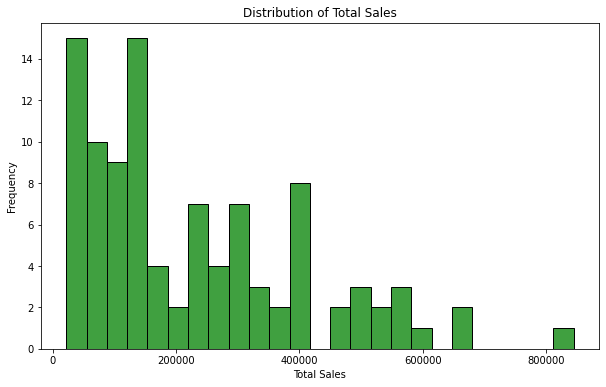

In [68]:
print("Univariate Analysis (Single Variable Insights)")
print("Total_Sales")
plt.figure(figsize=(10,6))
sns.histplot(df['Total_sales'],bins = 25, color='green')
plt.title('Distribution of Total Sales')    
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


Profit Distribution


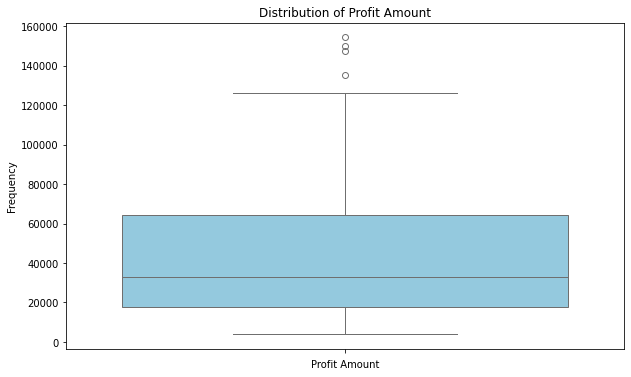

In [74]:
print("Profit Distribution")
plt.figure(figsize=(10,6))
sns.boxplot(df['Profit_Amount'], color='skyblue')
plt.title('Distribution of Profit Amount')
plt.xlabel('Profit Amount')
plt.ylabel('Frequency') 
plt.show()

Product_Category


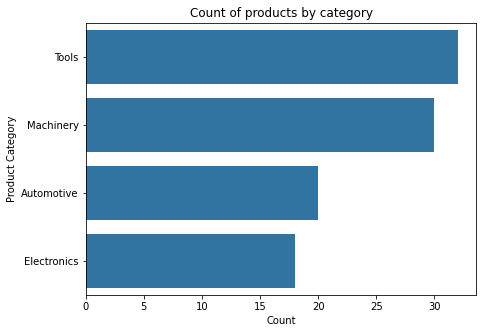

In [77]:
print("Product_Category")
plt.figure(figsize=(7,5))
sns.countplot(y=df['Product_Category'])
plt.title('Count of products by category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

Region


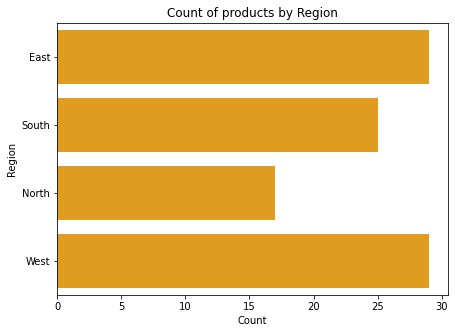

In [78]:
print('Region')
plt.figure(figsize=(7,5))
sns.countplot(y=df['Region'], color='orange')
plt.title('Count of products by Region')    
plt.xlabel('Count')
plt.ylabel('Region')    
plt.show()

Sales_Channel


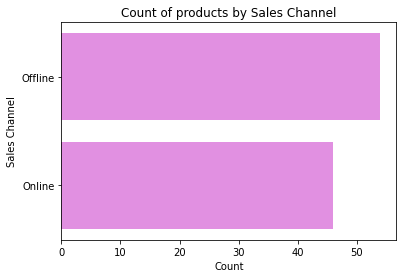

In [81]:
print('Sales_Channel')
sns.countplot(y=df['Sales_Channel'], color='violet')
plt.title('Count of products by Sales Channel')
plt.xlabel('Count')
plt.ylabel('Sales Channel') 
plt.show()

Bivariate Analysis (Relationships Between Two Variables)
Total_Sales vs Profit


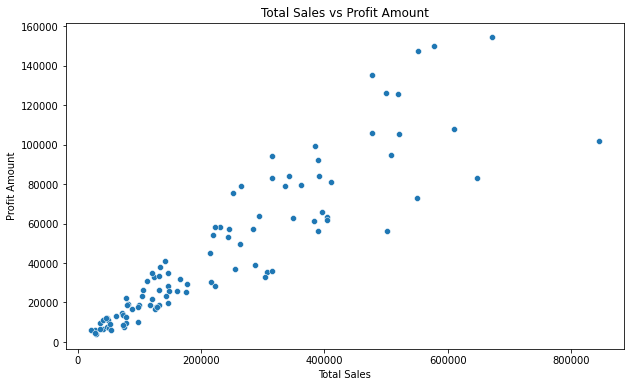

In [82]:
print('Bivariate Analysis (Relationships Between Two Variables)')
print('Total_Sales vs Profit')
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Total_sales'], y=df['Profit_Amount']) 
plt.title('Total Sales vs Profit Amount')
plt.xlabel('Total Sales')
plt.ylabel('Profit Amount')
plt.show()


Discount vs Profit


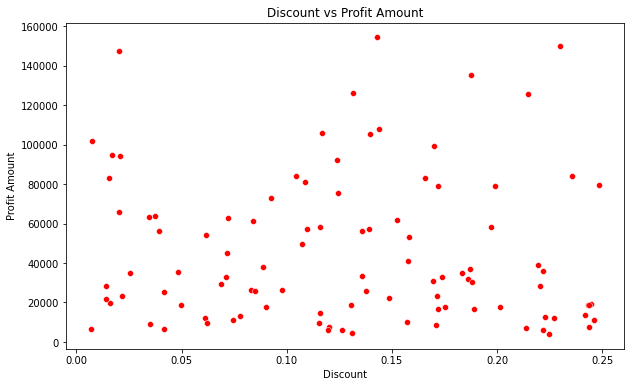

In [83]:
print('Discount vs Profit')
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Discount'], y=df['Profit_Amount'], color='red')
plt.title('Discount vs Profit Amount')  
plt.xlabel('Discount')
plt.ylabel('Profit Amount')
plt.show()

Product_Category vs Profit


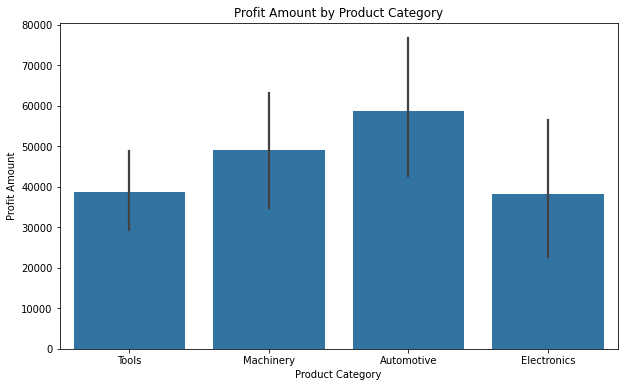

In [88]:
print('Product_Category vs Profit')
plt.figure(figsize=(10,6))
sns.barplot(x=df['Product_Category'], y=df['Profit_Amount'])
plt.xlabel('Product Category')
plt.ylabel('Profit Amount')
plt.title('Profit Amount by Product Category')  
plt.show()

Region vs Total_Sales


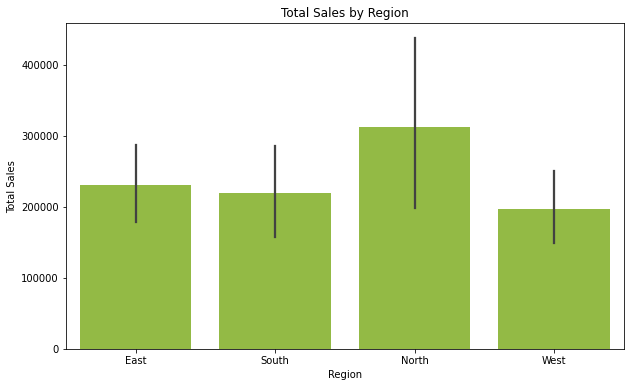

In [90]:
print('Region vs Total_Sales')
plt.figure(figsize=(10,6))
sns.barplot(x=df['Region'], y=df['Total_sales'], color='yellowgreen')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

Customer_Type vs Profit


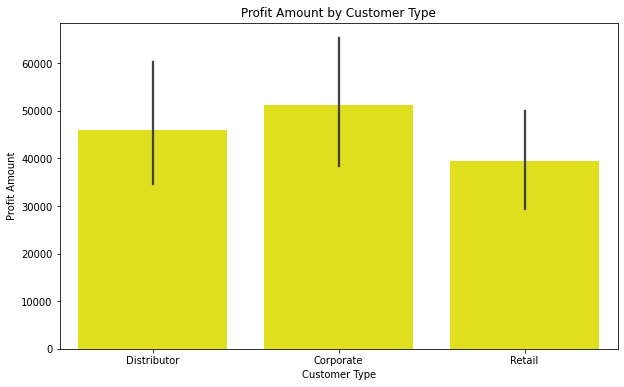

In [93]:
print('Customer_Type vs Profit')
plt.figure(figsize=(10,6))
sns.barplot(x=df['Customer_Type'], y=df['Profit_Amount'], color='yellow')
plt.title('Profit Amount by Customer Type')  
plt.xlabel('Customer Type')
plt.ylabel('Profit Amount')
plt.show()

Sales_Channel vs Customer_Type


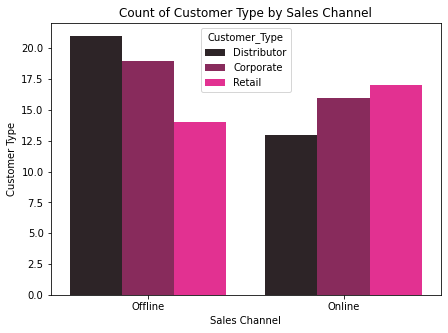

In [98]:
print('Sales_Channel vs Customer_Type')
plt.figure(figsize=(7,5))
sns.countplot(x=df['Sales_Channel'], hue=df['Customer_Type'], palette='dark:deeppink')
plt.title('Count of Customer Type by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Customer Type')    
plt.show()

Correlation Matrix of Numeric Variables
               Profit_Amount  Discount  Units_Sold  Unit_Price  Total_sales
Profit_Amount       1.000000 -0.061196    0.618003    0.614370     0.900109
Discount           -0.061196  1.000000   -0.040882    0.004334    -0.128646
Units_Sold          0.618003 -0.040882    1.000000   -0.003212     0.689082
Unit_Price          0.614370  0.004334   -0.003212    1.000000     0.646484
Total_sales         0.900109 -0.128646    0.689082    0.646484     1.000000


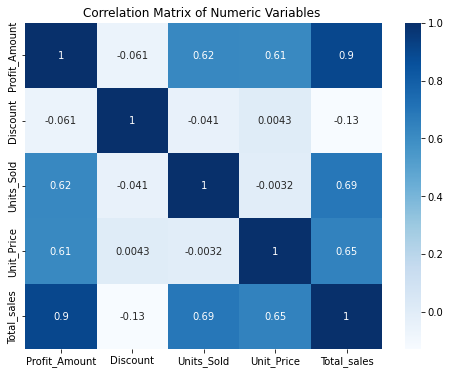

In [119]:
print('Correlation Matrix of Numeric Variables')
numerical_cols = ['Profit_Amount', 'Discount', 'Units_Sold', 'Unit_Price', 'Total_sales']
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='Blues')
plt.title('Correlation Matrix of Numeric Variables ')
plt.show()

Trend analysis by Year, Month, and Quarter


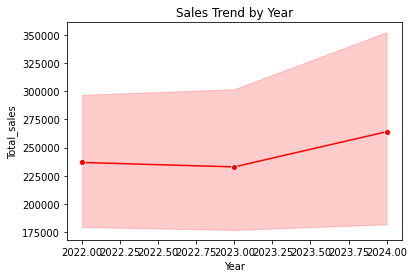

Monthly Sales Trend


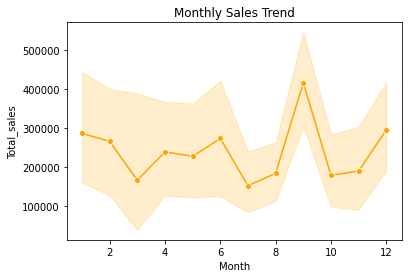

Quarterly Sales Trend


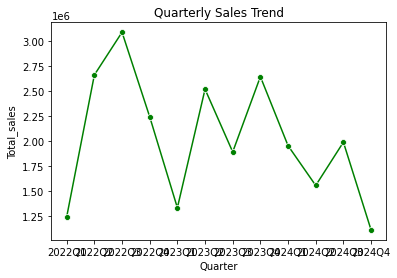

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period("Q")
df['Total_sales'] = df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])
print("Trend analysis by Year, Month, and Quarter")
sns.lineplot(data=df, x='Year', y='Total_sales', marker='o', color='red')
plt.title('Sales Trend by Year')
plt.show()
print("Monthly Sales Trend")
sns.lineplot(data=df, x='Month', y='Total_sales', marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.show()
print("Quarterly Sales Trend")
quarterly = df.groupby('Quarter', as_index=False).agg({'Total_sales': 'sum'})
quarterly['Quarter'] = quarterly['Quarter'].astype(str)
sns.lineplot(data=quarterly, x='Quarter', y='Total_sales', marker='o', color='green')
plt.title('Quarterly Sales Trend')
plt.show()